### GNOM Testing with Classical ML - Linear Regression

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#### 200 Epochs, Learning Rate = 0.01

In [37]:
GD_file_path = "wine/GD/lr-0.01/200/2024-09-18-16:15:08/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [38]:
GNOM_file_path = "wine/GNOM/lr-0.01/200/2024-09-18-16:18:09/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [39]:
GNOM_stats.head()

,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm
0,1,31.725208,11.211828,0.198831,29.585192,34.007914
1,2,29.207855,10.721018,0.030757,27.333145,32.136962
2,3,26.931625,10.272343,0.025895,25.264517,30.627947
3,4,24.853575,9.852093,0.027441,23.358603,29.307184
4,5,22.947563,9.453639,0.085119,21.600653,28.095872


#### 200 Epochs, Learning Rate = 0.1

In [44]:
GD_file_path = "wine/GD/lr-0.01/200/2024-09-18-16:15:08/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [45]:
GNOM_file_path = "wine/GNOM/lr-0.01/200/2024-09-18-16:18:09/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [ ]:
GNOM_stats.head()

,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm
0,1,31.725208,11.211828,0.198831,29.585192,34.007914
1,2,29.207855,10.721018,0.030757,27.333145,32.136962
2,3,26.931625,10.272343,0.025895,25.264517,30.627947
3,4,24.853575,9.852093,0.027441,23.358603,29.307184
4,5,22.947563,9.453639,0.085119,21.600653,28.095872


#### 500 Epochs, Learning Rate = 0.01

In [42]:
GD_file_path = "wine/GD/lr-0.01/500/2024-09-18-16:34:38/results.csv"
GD_stats = pd.read_csv(GD_file_path)

In [43]:
GNOM_file_path = "wine/GNOM/lr-0.01/500/2024-09-18-16:33:30/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

### Plots

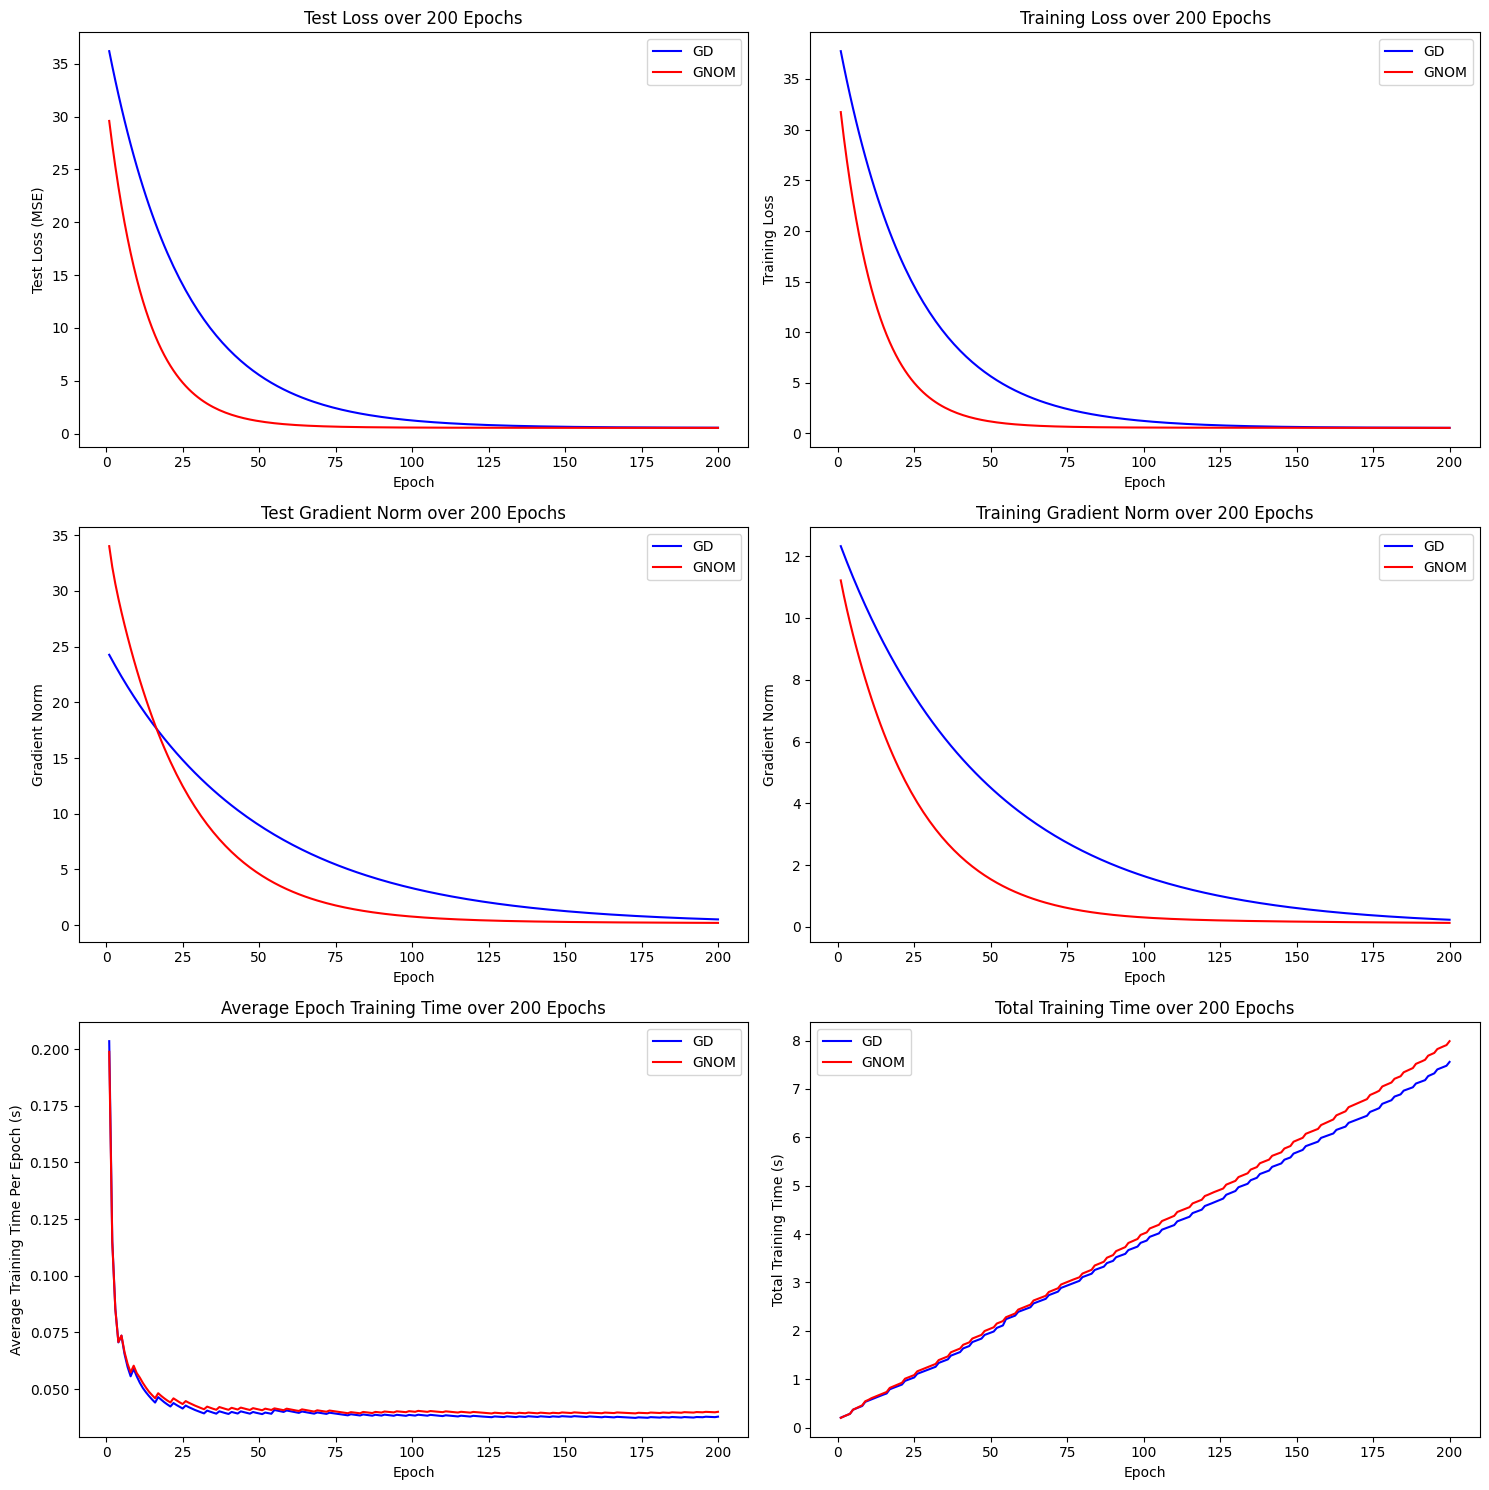

In [46]:
# Extract data from DataFrames
epochs = GD_stats['Epoch']
num_epochs = len(epochs)

GD_test_loss = GD_stats['Test Loss']
GNOM_test_loss = GNOM_stats['Test Loss']

GD_training_loss = GD_stats['Training Loss']
GNOM_training_loss = GNOM_stats['Training Loss']

GD_train_norm = GD_stats['Training Gradient Norm']
GNOM_train_norm = GNOM_stats['Training Gradient Norm']

GD_test_norm = GD_stats['Test Gradient Norm']
GNOM_test_norm = GNOM_stats['Test Gradient Norm']

# Calculate average training time (expanding mean)
GD_avg_training_time = GD_stats['Training Time (s)'].expanding().mean()
GNOM_avg_training_time = GNOM_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding mean)
GD_total_training_time = GD_stats['Training Time (s)'].expanding().sum()
GNOM_total_training_time = GNOM_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 5: Average Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()